In [50]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

from dtw import dtw
from my_dtw.utils import *
from scipy.io import wavfile

In [2]:
CHUNK = 512  # 每个缓冲区的帧数
CHANNELS = 1  # 单声道
RATE = 44100  # 采样频率

In [ ]:
def score_mfcc(mfcc_1, mfcc_2):
    return dtw(mfcc_1, mfcc_2, dist_method='euclidean')

In [ ]:
template = Voice(r'./recordings/1_1_.wav')
me = Voice(r'./recordings/1_2_.wav')

In [202]:
template = librosa.load(r'./recordings/template_processed.wav', sr=None)
print(template[0].shape, template[1])
hei = librosa.load(r'./recordings/hei_processed.wav', sr=None)
print(hei[0].shape, hei[1])
zuoxia = librosa.load(r'./recordings/zuoxia_processed.wav', sr=None)
print(zuoxia[0].shape, zuoxia[1])

(22528,) 44100
(28672,) 44100
(13824,) 44100


Text(0.5, 1.0, 'Monophonic')

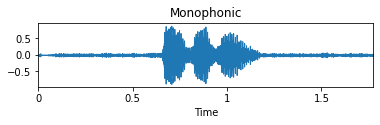

In [7]:
template = librosa.load(r'./recordings/1_1.wav', sr=None)

plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(template[0], sr=RATE)
plt.title('Monophonic')

0.8701782

(20, 46)


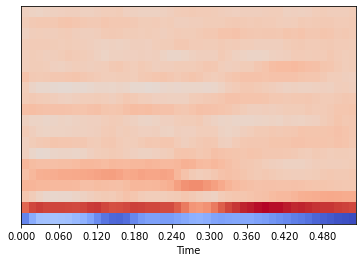

In [8]:
sr = 44100

template_mfccs = librosa.feature.mfcc(template[0], sr=sr)
print(template_mfccs.shape)

#Displaying the MFCCs:
librosa.display.specshow(template_mfccs, sr=sr, x_axis='time')

In [212]:
sr = 44100

template_mfccs = librosa.feature.mfcc(template[0], sr=sr)
print(template_mfccs.shape)

hei_mfccs = librosa.feature.mfcc(hei[0], sr=sr)
print(hei_mfccs.shape)

zuoxia_mfccs = librosa.feature.mfcc(zuoxia[0], sr=sr)
print(zuoxia_mfccs.shape)

(20, 45)
(20, 57)
(20, 28)


In [205]:
a = dtw(hei_mfccs.T, template_mfccs.T, dist_method='euclidean')
b = dtw(zuoxia_mfccs.T, template_mfccs.T, dist_method='euclidean')


In [206]:
a.distance, b.distance

(4168.534450061933, 6465.938028357658)

In [207]:
a.normalizedDistance, b.normalizedDistance

(40.86798480452875, 88.574493539146)

# 端点检测-1

In [34]:
# 符号函数
def sgn(n):
    if n >=0 :
        return 1
    else:
        return 0

# 短时能量
def cal_energy(wave_data, frame_size=1024):
    sum = 0
    energy = []
    step = frame_size >> 1 
    for i in range(len(wave_data)):
#         sum += int(wave_data[i]**2)
#         print(i, wave_data[i])
        sum = sum + int(wave_data[i]) * int(wave_data[i])
        if (i + 1) % step == 0:
            energy.append(sum)
            sum = 0
        elif i == len(wave_data) - 1:
            energy.append(sum)
    return energy


# 短时过零率
def zero_cross_rate(wave_data, frame_size=1024):
    zcr = []
    sum = 0.0
    N = len(wave_data)
    _fs = frame_size - 1
    
    for i in range(N):
        if i % frame_size == 0:
            continue
        sum += np.abs(sgn(wave_data[i]) - sgn(wave_data[i - 1]))
        
        if (i + 1) % frame_size == 0 or i == len(wave_data) - 1:
            zcr.append(sum / 255)
            sum = 0.0
    return zcr

In [213]:
# audio point check
def strip_silence(wave_data, frame_length=512, hop_length=256):
    energies = librosa.feature.rms(y=wave_data, frame_length=frame_length, hop_length=hop_length)[0]
    thres = 2 * np.median(energies)
    keep_index = np.where(energies > thres)
    new_signal_index = librosa.frames_to_samples(keep_index, hop_length=hop_length)[0]
    new_signal = np.concatenate([wave_data[x: x + hop_length] for x in new_signal_index if x < len(wave_data)])
    return new_signal

In [248]:
template = librosa.load(r'./recordings/hei_1.wav', sr=None)
# template = librosa.load(r'./template_processed_22.wav', sr=None)

energies = librosa.feature.rms(y=template[0], frame_length=CHUNK, hop_length=CHUNK//2)
# S, phase = librosa.magphase(librosa.stft(template[0]))
# energies = librosa.feature.rms(S=S)

energies.shape, energies

((1, 307),
 array([[0.01484891, 0.01869349, 0.01716645, 0.00835146, 0.00490072,
         0.0039664 , 0.00308446, 0.00278975, 0.00427531, 0.007256  ,
         0.00902174, 0.00798089, 0.00896921, 0.01255635, 0.01199964,
         0.01573703, 0.01834616, 0.01482241, 0.01782421, 0.01808631,
         0.01833151, 0.01676749, 0.01925392, 0.02138822, 0.01635909,
         0.01780197, 0.01929312, 0.01694762, 0.01587857, 0.01524573,
         0.01651851, 0.02245991, 0.02364388, 0.01895583, 0.01920386,
         0.02174607, 0.02110161, 0.02606663, 0.0247869 , 0.02115367,
         0.01984422, 0.02037754, 0.01828906, 0.01636884, 0.01910341,
         0.01828574, 0.02388668, 0.02373165, 0.02110428, 0.02189882,
         0.01621443, 0.01065934, 0.01408415, 0.01464633, 0.01584072,
         0.016989  , 0.01657869, 0.01970397, 0.02585958, 0.02402519,
         0.02236019, 0.03008761, 0.02665039, 0.02471797, 0.02806943,
         0.02567775, 0.02402042, 0.01954461, 0.01392177, 0.01452813,
         0.01515197, 0.

In [246]:
thres = 2 * np.median(energies[0])
print(thres)
keep_index = np.where(energies[0] > thres)

new_signal_index = librosa.frames_to_samples(keep_index, hop_length=256)[0]

new_signal = np.concatenate([template[0][x: x + 256] for x in new_signal_index if x < len(template[0])])

# segments = np.array(
#     [template[0][x: x + segment_frames] for x in range(0, len(template[0]), segment_frames)]
# )

# new_signal = np.concatenate(segments[keep_index])
# new_signal = np.zeros(template[0].shape)
# new_signal[keep_index] = template[0][keep_index]
print(new_signal.shape)
new_signal *= 2**15  # AKA, new_signal *= 2<<14, this is for PyAudio to be able to play this file
wavfile.write("./template_processed_22.wav", 44100, new_signal.astype(np.int16))

0.045363735407590866
(22528,)


In [181]:
# template[0].shape, new_signal.shape
new_signal_index

array([[    0,   256,   512,  3328,  3584,  3840,  4096,  4352,  4608,
         4864,  5120,  5376,  5632,  5888,  6144,  6400,  6656,  6912,
         7168,  7424,  7680,  7936,  8192,  8448,  8704,  8960,  9216,
         9472,  9728,  9984, 10240, 10496, 10752, 11008, 11264, 11520,
        11776, 12032, 12288, 12544, 12800, 13312, 13568, 13824, 14080,
        14336, 14592, 14848, 15104, 15360, 15616, 15872, 16128, 16384,
        16640, 16896, 17152, 17408, 17664, 17920, 18176, 18432, 18688,
        18944, 19200, 19456, 19712, 19968, 20224, 20480, 20736, 20992,
        21248, 21504, 21760, 22016, 22272, 22528, 22784, 23040, 23296,
        23552, 23808, 24064, 24320, 24576, 24832, 25088, 25344, 25600,
        25856, 26112, 26368, 26624, 26880, 27136, 27392, 27648, 27904,
        28160, 28416, 28672, 28928, 29184, 29440, 29696, 29952, 30208,
        30464, 30720, 30976, 31232, 31488, 31744, 32000, 32256, 32512,
        32768, 33024, 33280, 33536, 33792, 34048, 34304, 34560, 34816,
      

In [196]:
hei = librosa.load(r'./recordings/1_2.wav', sr=44100)
zuoxia = librosa.load(r'./recordings/1_4.wav', sr=44100)

wavfile.write("./hei_processed.wav", 44100, strip_silence(hei[0]))
wavfile.write("./zuoxia_processed.wav", 44100, strip_silence(zuoxia[0]))

In [61]:
strip_silence(hei[0])

array([], dtype=float32)

In [ ]:
def strip(x, frame_length, hop_length):

    # Compute RMSE.
    rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length, center=True)
    
    # Identify the first frame index where RMSE exceeds a threshold.
    thresh = 0.5 * np.median(rmse)
    frame_index = 0
    while rmse[0][frame_index] < thresh:
        frame_index += 1
        
    # Convert units of frames to samples.
    start_sample_index = librosa.frames_to_samples(frame_index, hop_length=hop_length)
    
    # Return the trimmed signal.
    return x[start_sample_index:]

# 端点检测-2

In [129]:
segment_frames = 64
template = librosa.load(r'./recordings/1_1.wav', sr=None)
wave_data = template[0]

segments = np.array(
    [template[0][x: x + segment_frames] for x in range(0, len(template[0]), segment_frames)]
)
print(segments.shape)
# energies = librosa.feature.rms(y=template[0], frame_length=segment_frames, hop_length=segment_frames)
# S, phase = librosa.magphase(librosa.stft(template[0]))
# energies = librosa.feature.rms(S=S)
energies = np.array([(s**2).sum() / len(s) for s in segments])

energies.shape, energies

(1224, 64)


((1224,),
 array([0.0002512 , 0.000174  , 0.00012401, ..., 0.00055665, 0.00082946,
        0.00045964]))

In [140]:
thres = 3 * np.median(energies)

print(thres)
keep_index = (np.where(energies > thres)[0])
new_signal = np.concatenate(segments[keep_index])
# new_signal = np.zeros(template[0].shape)
# new_signal[keep_index] = template[0][keep_index]
print(new_signal.shape)
wavfile.write("./template_processed_3.wav", 44100, new_signal)

0.0015109843807294965
(23808,)


# 匹配

In [252]:
'asd.dd'.endswith('.DD')

False